# Remember to comment code

In [9]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
# data = pd.read_csv('../Data/Data Cleaning and Feature Eng/SL-recent-grads.csv')
# data.head()

# read in data
data = pd.read_csv('../Data/Data Cleaning and Feature Eng/recent-grads-new-features.csv')
data.head()

le = LabelEncoder()
data["Major_category_coded"] = le.fit_transform(data["Major_category"])
data.describe()

,Unnamed: 0,Rank,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,...,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science,Major_category_coded
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000
mean,86.075581,87.075581,3880.273256,39394.715116,358.127907,16723.877907,22653.656977,0.523090,31374.116279,26179.994186,...,0.168605,0.069767,0.087209,0.034884,0.005814,0.029070,0.05814,0.052326,0.052326,6.965116
std,50.221266,50.221266,1692.670105,63468.993551,619.578329,28122.182046,41053.785020,0.231135,50766.623538,42948.847324,...,0.375496,0.255498,0.282965,0.184021,0.076249,0.168493,0.23469,0.223333,0.223333,4.241118
min,0.000000,1.000000,1100.000000,609.000000,2.000000,119.000000,0.000000,0.000000,559.000000,488.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,42.750000,43.750000,2402.750000,4559.750000,42.000000,2177.500000,1851.500000,0.336026,3734.750000,3181.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000
50%,86.500000,87.500000,3607.500000,15104.000000,131.000000,5434.000000,8386.500000,0.539560,12031.500000,10073.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,7.000000
75%,129.250000,130.250000,5503.250000,38909.750000,339.000000,14631.000000,22553.750000,0.703299,31701.250000,25447.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,9.000000
max,172.000000,173.000000,6403.000000,393735.000000,4212.000000,173809.000000,307087.000000,0.968954,307933.000000,251540.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,15.000000


In [11]:
data.columns

Index(['Unnamed: 0', 'Rank', 'Major_code', 'Major', 'Major_category', 'Total',
       'Sample_size', 'Men', 'Women', 'ShareWomen', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs', 'Median_category', 'Num_majors', 'Percent_sample_size',
       'Percent_employed', 'Percent_unemployed', 'Percent_college',
       'Percent_non_college', 'Percent_low_wage', 'Percent_full_time',
       'Percent_part_time', 'Major_category_Agriculture & Natural Resources',
       'Major_category_Arts', 'Major_category_Biology & Life Science',
       'Major_category_Business', 'Major_category_Communications & Journalism',
       'Major_category_Computers & Mathematics', 'Major_category_Education',
       'Major_category_Engineering', 'Major_category_Health',
       'Major_category_Humanities & Liberal Arts',
       'Major_category_Industrial Arts & Consumer Servic

In [214]:
train, test = train_test_split(data,test_size=0.2, random_state=42)

Add data histograms here

In [229]:
## HYPERPARAMETERS FOR TUNING
MIN_SAMPLES_SPLIT = 10

c = DecisionTreeClassifier(min_samples_split=MIN_SAMPLES_SPLIT)

## Feature set 1

In [230]:
# 60
features = [
            'Major_category_coded',
            'Percent_full_time',
            'Percent_college',
            'Percent_non_college',
            'Percent_sample_size',
            'ShareWomen',
            'Unemployment_rate',
            'Women'
            ]

all_features = ['Major_category_coded', 'Total',
       'Sample_size', 'Men', 'Women', 'ShareWomen', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs', 'Num_majors', 'Percent_sample_size',
       'Percent_employed', 'Percent_unemployed', 'Percent_college',
       'Percent_non_college', 'Percent_low_wage', 'Percent_full_time']
# since sklearn does not support categorical variables - 57%
# features = [
#        'Major_category_Agriculture & Natural Resources',
#        'Major_category_Arts', 'Major_category_Biology & Life Science',
#        'Major_category_Business', 'Major_category_Communications & Journalism',
#        'Major_category_Computers & Mathematics', 'Major_category_Education',
#        'Major_category_Engineering', 'Major_category_Health',
#        'Major_category_Humanities & Liberal Arts',
#        'Major_category_Industrial Arts & Consumer Services',
#        'Major_category_Interdisciplinary',
#        'Major_category_Law & Public Policy',
#        'Major_category_Physical Sciences',
#        'Major_category_Psychology & Social Work',
#        'Major_category_Social Science',
#        'Percent_full_time',
#        'Percent_college',
#        'Percent_non_college',
#        'Percent_sample_size',
#        'ShareWomen',
#        'Unemployment_rate',
#        'Women'   
# ]

# all_features = [
#     'Total',
#        'Sample_size', 'Men', 'Women', 'ShareWomen', 'Employed', 'Full_time',
#        'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
#        'College_jobs', 'Non_college_jobs',
#        'Low_wage_jobs', 'Num_majors', 'Percent_sample_size',
#        'Percent_employed', 'Percent_unemployed', 'Percent_college',
#        'Percent_non_college', 'Percent_low_wage', 'Percent_full_time',
#     'Major_category_Agriculture & Natural Resources',
#        'Major_category_Arts', 'Major_category_Biology & Life Science',
#        'Major_category_Business', 'Major_category_Communications & Journalism',
#        'Major_category_Computers & Mathematics', 'Major_category_Education',
#        'Major_category_Engineering', 'Major_category_Health',
#        'Major_category_Humanities & Liberal Arts',
#        'Major_category_Industrial Arts & Consumer Services',
#        'Major_category_Interdisciplinary',
#        'Major_category_Law & Public Policy',
#        'Major_category_Physical Sciences',
#        'Major_category_Psychology & Social Work',
#        'Major_category_Social Science'
# ]
       

# ## 65.7%
# features = [
#             'Major_category_coded',
#             'Percent_low_wage',
#             'Percent_college',
#             'Percent_non_college',
#             'Percent_sample_size',
#             'ShareWomen',
#             'Unemployment_rate',
#             'P25th',
#             'P75th']
    

# encode predicted class variable as numerical label
le = LabelEncoder()
le.fit(data["Median_category"])

LabelEncoder()

In [320]:
PARAMS = list(range(2, 100, 5))
ACCURACY_SCORES = []
ACCURACY_SCORES_ENTROPY = []
for param in PARAMS:
    c = DecisionTreeClassifier(min_samples_split=param, criterion='gini', max_leaf_nodes=param)

    features = [
                'Major_category_coded',
                'Percent_full_time',
                'Percent_college',
                'Percent_non_college',
                'Percent_sample_size',
                'ShareWomen',
                'Unemployment_rate',
                'Women'
                ]

    X_train = train[all_features]
    y_train = le.transform(train['Median_category'])

    X_test = test[all_features]
    y_test = le.transform(test['Median_category'])
    c.fit(X_train,y_train)
    y_pred = c.predict(X_test)
    score = accuracy_score(y_test,y_pred)*100
    print("Test Accuracy using gini, ", param, ": ", score )
#     print("Training accuracy using gini,", sample, ": ", accuracy_score(y_train, c.predict(X_train)))

    ACCURACY_SCORES.append(score)
    
for param in PARAMS:
    c = DecisionTreeClassifier(min_samples_split=param, criterion='entropy', max_leaf_nodes=param)

    features = [
                'Major_category_coded',
                'Percent_full_time',
                'Percent_college',
                'Percent_non_college',
                'Percent_sample_size',
                'ShareWomen',
                'Unemployment_rate',
                'Women'
                ]

    X_train = train[all_features]
    y_train = le.transform(train['Median_category'])

    X_test = test[all_features]
    y_test = le.transform(test['Median_category'])
    c.fit(X_train,y_train)
    y_pred = c.predict(X_test)
    score = accuracy_score(y_test,y_pred)*100
    print("Test Accuracy using entropy,", param, ": ", score )
#     print("Training accuracy using entropy,", sample, ": ", accuracy_score(y_train, c.predict(X_train)))
    ACCURACY_SCORES_ENTROPY.append(score)

Test Accuracy using gini,  2 :  45.714285714285715
Test Accuracy using gini,  7 :  51.42857142857142
Test Accuracy using gini,  12 :  57.14285714285714
Test Accuracy using gini,  17 :  51.42857142857142
Test Accuracy using gini,  22 :  57.14285714285714
Test Accuracy using gini,  27 :  48.57142857142857
Test Accuracy using gini,  32 :  48.57142857142857
Test Accuracy using gini,  37 :  45.714285714285715
Test Accuracy using gini,  42 :  45.714285714285715
Test Accuracy using gini,  47 :  45.714285714285715
Test Accuracy using gini,  52 :  48.57142857142857
Test Accuracy using gini,  57 :  45.714285714285715
Test Accuracy using gini,  62 :  45.714285714285715
Test Accuracy using gini,  67 :  45.714285714285715
Test Accuracy using gini,  72 :  45.714285714285715
Test Accuracy using gini,  77 :  45.714285714285715
Test Accuracy using gini,  82 :  45.714285714285715
Test Accuracy using gini,  87 :  45.714285714285715
Test Accuracy using gini,  92 :  45.714285714285715
Test Accuracy using g

In [308]:
c = DecisionTreeClassifier(min_samples_split=15, criterion='entropy')

features = [
            'Major_category_coded',
            'Percent_full_time',
            'Percent_college',
            'Percent_non_college',
            'Percent_sample_size',
            'ShareWomen',
            'Unemployment_rate',
            'Women'
            ]

X_train = train[all_features]
y_train = le.transform(train['Median_category'])

X_test = test[all_features]
y_test = le.transform(test['Median_category'])
c.fit(X_train,y_train)
y_pred = c.predict(X_test)
score = accuracy_score(y_test,y_pred)*100
print("Test Accuracy using entropy,", 15, ": ", score )
#     print("Training accuracy using entropy,", sample, ": ", accuracy_score(y_train, c.predict(X_train)))

Test Accuracy using entropy, 15 :  71.42857142857143


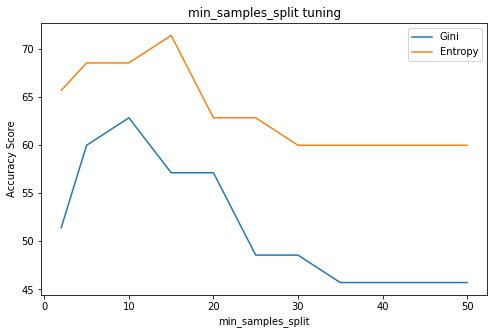

In [304]:
plt.figure(num = 3, figsize=(8, 5))  
plt.plot(MIN_SAMPLES, ACCURACY_SCORES, label="Gini")
plt.plot(MIN_SAMPLES, ACCURACY_SCORES_ENTROPY, label="Entropy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy Score")
plt.title("min_samples_split tuning")
plt.legend(loc="upper right")

plt.show()

,Major_category_coded,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,...,Non_college_jobs,Low_wage_jobs,Num_majors,Percent_sample_size,Percent_employed,Percent_unemployed,Percent_college,Percent_non_college,Percent_low_wage,Percent_full_time
101,15,19879,214,8422,13638,0.618223,16181,13616,4543,10548,...,10605,1895,9.0,0.010765,0.813975,0.087680,0.169677,0.533478,0.095327,0.684944
56,15,28187,219,10345,17842,0.632987,21190,18681,5563,13583,...,9570,2499,9.0,0.007770,0.751765,0.080569,0.240324,0.339518,0.088658,0.662752
42,5,36698,425,515,1247,0.707719,28459,26348,4332,21130,...,11783,1672,11.0,0.011581,0.775492,0.079950,0.363617,0.321080,0.045561,0.717968
82,2,1329,9,626,703,0.528969,1010,946,169,740,...,184,56,14.0,0.006772,0.759970,0.000000,0.509406,0.138450,0.042137,0.711813
65,7,8804,125,124,0,0.000000,7502,7001,1240,5825,...,3896,386,29.0,0.014198,0.852113,0.047251,0.277828,0.442526,0.043844,0.795207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,2439,44,10624,15270,0.589712,2174,1819,620,1528,...,893,94,10.0,0.018040,0.891349,0.074621,0.219352,0.366134,0.038540,0.745797
106,0,13773,152,27015,35037,0.564639,11797,10722,2613,6954,...,5808,1405,10.0,0.011036,0.856531,0.061134,0.314601,0.421695,0.102011,0.778480
14,7,4321,30,3526,795,0.183985,3608,2999,811,2004,...,947,263,29.0,0.006943,0.834992,0.005323,0.564453,0.219162,0.060866,0.694052
92,4,213996,2394,476,209,0.305109,179633,147335,49889,116251,...,97964,27440,4.0,0.011187,0.839422,0.068235,0.190485,0.457784,0.128227,0.688494


In [309]:
print(tree.export_text(c))

|--- feature_15 <= 22.50
|   |--- feature_8 <= 2199.00
|   |   |--- feature_16 <= 0.01
|   |   |   |--- class: 1
|   |   |--- feature_16 >  0.01
|   |   |   |--- feature_8 <= 366.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_8 >  366.50
|   |   |   |   |--- feature_5 <= 0.43
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_5 >  0.43
|   |   |   |   |   |--- class: 3
|   |--- feature_8 >  2199.00
|   |   |--- feature_5 <= 0.46
|   |   |   |--- feature_21 <= 0.12
|   |   |   |   |--- class: 3
|   |   |   |--- feature_21 >  0.12
|   |   |   |   |--- class: 2
|   |   |--- feature_5 >  0.46
|   |   |   |--- feature_21 <= 0.05
|   |   |   |   |--- class: 3
|   |   |   |--- feature_21 >  0.05
|   |   |   |   |--- feature_21 <= 0.17
|   |   |   |   |   |--- feature_5 <= 0.69
|   |   |   |   |   |   |--- feature_0 <= 14.00
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_0 >  14.00
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   

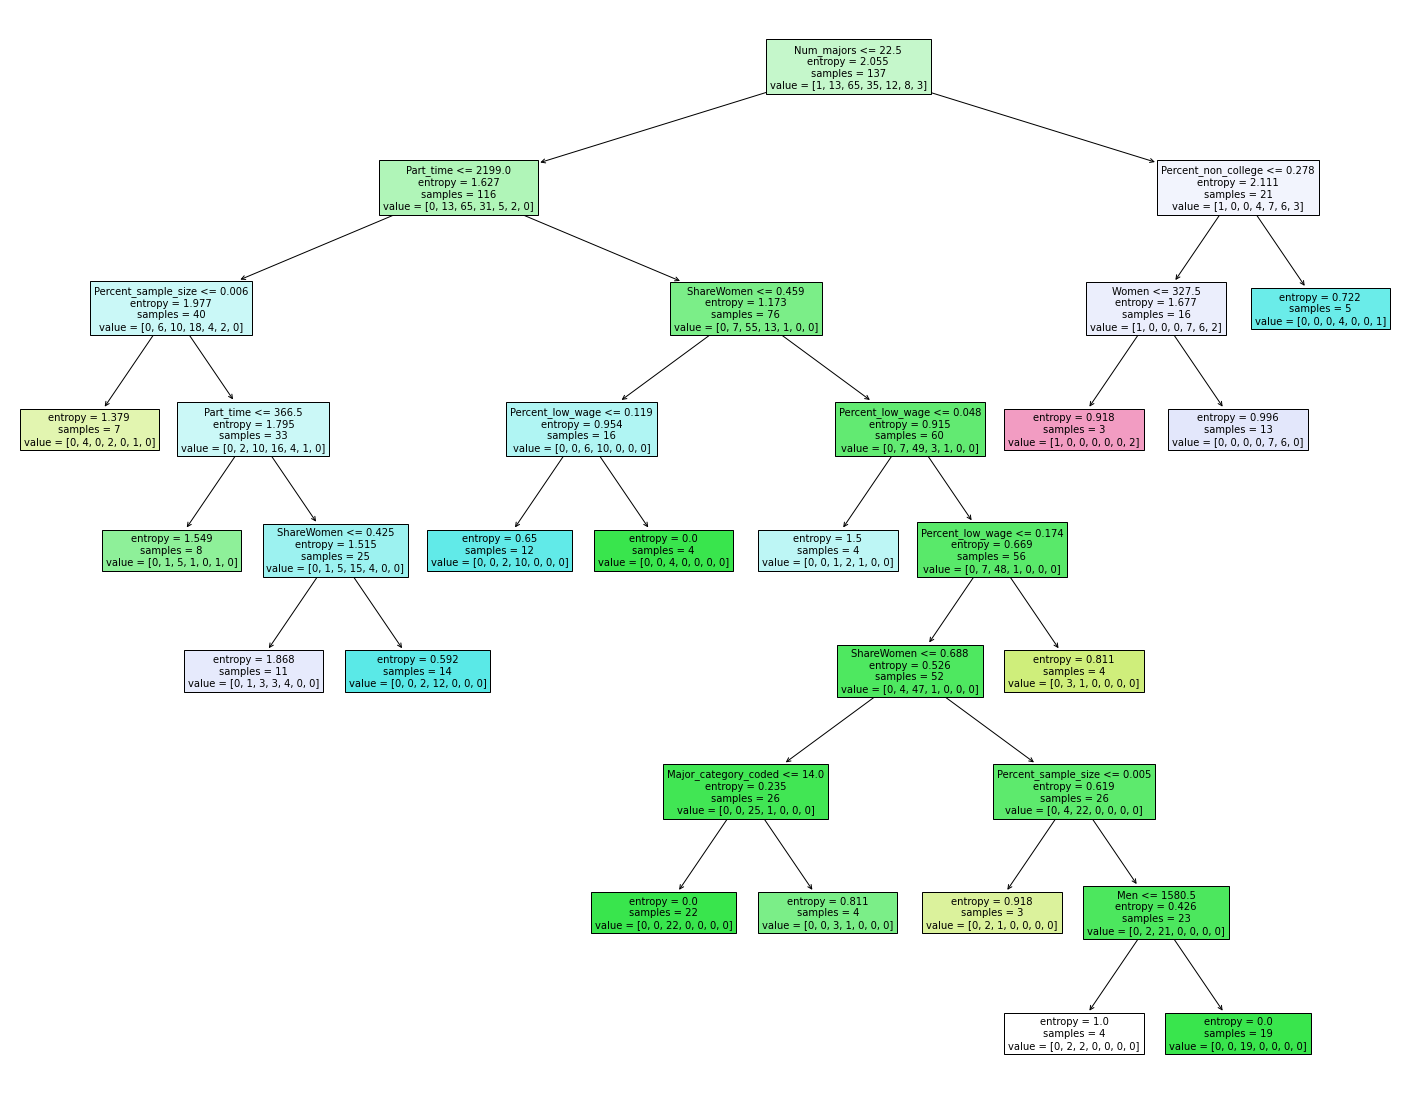

In [310]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(c, 
                   feature_names=X_train.columns,  
#                    class_names=iris.target_names,
                   filled=True)
fig.savefig("decision_tree.png")

## Feature set 3

In [61]:
features = [
 'Percent_low_wage',
 'Percent_college',
 'Percent_non_college',
 'ShareWomen',
 'Women',
 'Part_time',
 'P25th',
 'P75th',
 'Percent_sample_size',
 'Major_category_Agriculture & Natural Resources',
 'Major_category_Arts',
 'Major_category_Biology & Life Science',
 'Major_category_Business',
 'Major_category_Communications & Journalism',
 'Major_category_Computers & Mathematics',
 'Major_category_Education',
 'Major_category_Engineering',
 'Major_category_Health',
 'Major_category_Humanities & Liberal Arts',
 'Major_category_Industrial Arts & Consumer Services',
 'Major_category_Interdisciplinary',
 'Major_category_Law & Public Policy',
 'Major_category_Physical Sciences',
 'Major_category_Psychology & Social Work',
 'Major_category_Social Science']

In [62]:
X_train = train[features]
y_train = train['Median_category']

X_test = test[features]
y_test = test['Median_category']

In [63]:
c.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=100)

In [64]:
import imageio,io
import pydotplus

In [65]:
def show_tree(tree,features,path):
  f = io.StringIO()
  export_graphviz(tree,out_file=f,feature_names=features)
  pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
  img = imageio.imread(path)
  plt.rcParams['figure.figsize'] = (20,20)
  plt.imshow(img)

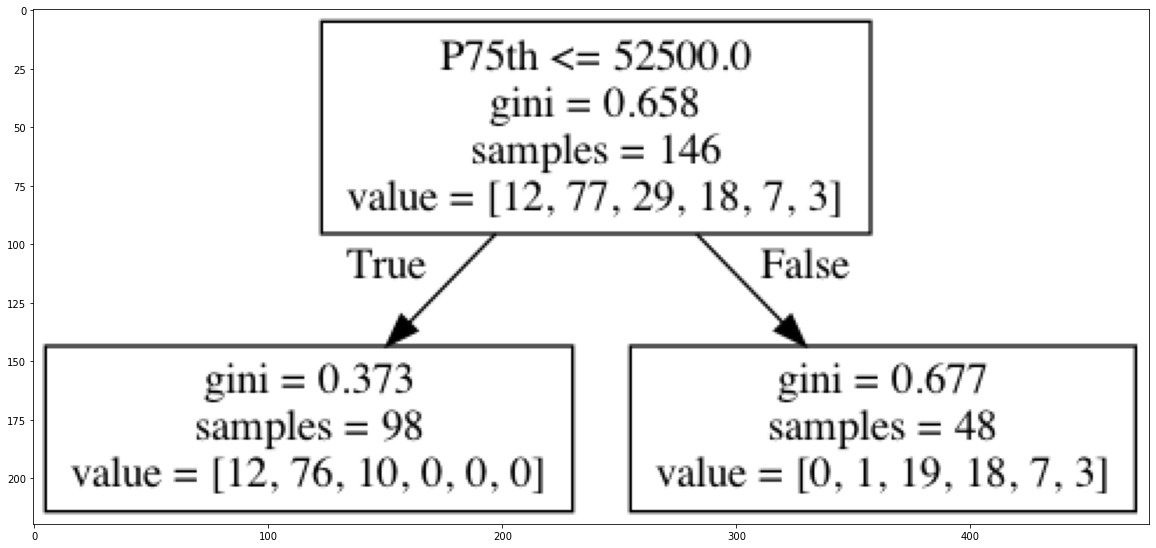

In [66]:
show_tree(c,features,'decision_tree')

In [67]:
y_pred = c.predict(X_test)

In [68]:
score = accuracy_score(y_test,y_pred)*100

In [69]:
print("Accuracy using Decision Tree: ",score )

Accuracy using Decision Tree:  46.15384615384615


In [324]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'min_samples_split': list(range(2, 50))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/Users/amyjian/.pyenv/versions/3.8.1/envs/venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19,
                                               20, 21, 22, 23, 24, 25, 26, 27,
                                               28, 29, 30, 31, ...]},
             verbose=1)

In [325]:
grid_search_cv.best_estimator_


DecisionTreeClassifier(min_samples_split=5, random_state=42)